In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, 
    roc_curve, precision_recall_curve, log_loss, f1_score
)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\TERM 5\Digital Transformation and Robotic Process Automation\AI ML Assignment\NIFTY.csv")

Accuracy: 0.6821862348178138
Confusion Matrix:
 [[ 97 107]
 [ 50 240]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.48      0.55       204
           1       0.69      0.83      0.75       290

    accuracy                           0.68       494
   macro avg       0.68      0.65      0.65       494
weighted avg       0.68      0.68      0.67       494

F1 Score: 0.7535321821036107
ROC-AUC Score: 0.6515382014874915
Log Loss: 11.45516919451699


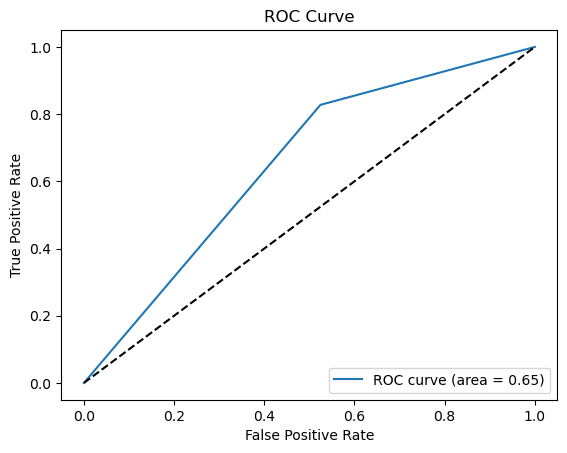

In [3]:
# Feature columns (replace 'feature1', 'feature2', etc. with actual feature names)
X = data[['X1', 'X2', 'X3', 'X4']]  
y = data['Y']  

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred)


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Log Loss:", log_loss_value)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()